# Л.Р. №4 Вариант 2, Гаврилюк и Ермаков

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Определение функции Рунге

In [2]:
def f(x):
    return 1 / (1 + 25 * x * x)

#### Определение и. м. Лагранжа

In [3]:
def joseph_louis(x, n, func):
    nodes = np.linspace(-1, 1, n)
    result = np.zeros(x.size)
    for node_summ in nodes:
        multipl = np.ones(x.size)
        for node_frac in nodes:
            if node_frac != node_summ:
                multipl *= (x - node_frac)/(node_summ-node_frac)
        result += func(node_summ) * multipl
    return result

#### Задание наклона сплайна

In [4]:
def m(i, x_node, h):
    if i == 0:
        return (-3 * f(x_node[0]) + 4 * f(x_node[1]) - f(x_node[2])) / (2 * h)
    if i == len(x_node)-1:
        return (3 * f(x_node[i]) - 4 * f(x_node[i-1] + f(x_node[i-2]))) / (2 * h)
    return (f(x_node[i+1]) - f(x_node[i-1])) / (2 * h)

In [5]:
def m_2(x):
    return -(50 * x) / ((1 + 25 * x * x) ** 2)

#### Задание кубического сплайна на внутреннем отрезке

In [6]:
def spline_3(i, x_node, h, x_seg, flag):
    if flag:
        return ((((x_node[i+1] - x_seg)**2 * (2 * (x_seg - x_node[i]) + h)) * f(x_node[i]) +
                ((x_seg - x_node[i])**2 * (2*(x_node[i+1] - x_seg) + h)) * f(x_node[i+1])) / (h**3) +
                ((x_node[i+1] - x_seg)**2 * (x_seg - x_node[i]) * m(i, x_node, h) + 
                (x_seg - x_node[i])**2 * (x_seg - x_node[i+1]) * m(i+1, x_node, h)) / (h**2))
    return ((((x_node[i+1] - x_seg)**2 * (2 * (x_seg - x_node[i]) + h)) * f(x_node[i]) +
                ((x_seg - x_node[i])**2 * (2*(x_node[i+1] - x_seg) + h)) * f(x_node[i+1])) / (h**3) +
                ((x_node[i+1] - x_seg)**2 * (x_seg - x_node[i]) * m_2(x_node[i]) + 
                (x_seg - x_node[i])**2 * (x_seg - x_node[i+1]) * m_2(x_node[i+1])) / (h**2))

#### Определение отрезка интерполяции и разбиение на сетку

In [7]:
a = -1
b = 1
n_segments = [3, 8, 12, 13, 12, 13]
eps = 0.001
x = np.arange(a, b + eps, eps)


#### Визуализация кубического сплайна, и.м. Лагранжа и ф-ции Рунге

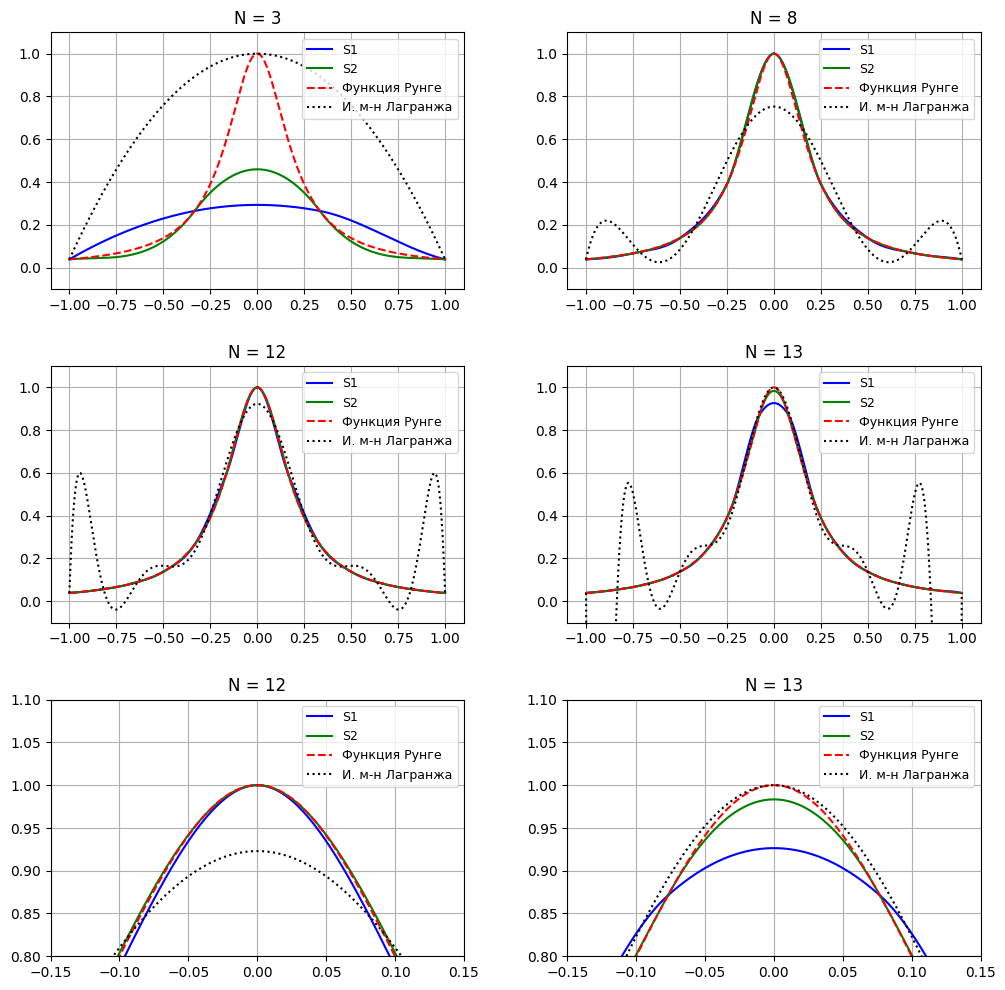

In [8]:
labels = ['1', '2', '3', '4']
colors = ['red', 'green', 'blue', 'black']
flags = [0, 0, 0, 0, 1, 1]
fig, axes = plt.subplots(3, 2)
fig.set_figwidth(12)
fig.set_figheight(12)
fig.subplots_adjust(wspace = 0.25, hspace = 0.3)
for n, ax, flag in zip(n_segments, axes.reshape(6), flags):
    h = (b - a) / n-
    x_node = np.arange(a, b + h, h)
    for i in range(n):
        x_seg = np.arange(x_node[i], x_node[i] + h + eps, eps)
        spline_1 = spline_3(i, x_node, h, x_seg, 1)
        spline_2 = spline_3(i, x_node, h, x_seg, 0)
        ax.set_title(f'N = {n}')
        if not flag:
            ax.set_ylim(-0.1, 1.1)
        else:
            ax.set_ylim(0.8, 1.1)
            ax.set_xlim(-0.15,0.15)
        ax.grid(True)
        if i == 0:
            ax.plot(x_seg, spline_1, color='blue', label='S1')
            ax.plot(x_seg, spline_2, color='green', label='S2')
        else:
            ax.plot(x_seg, spline_1, color='blue')
            ax.plot(x_seg, spline_2, color='green')
    ax.plot(x, f(x),'--', color='red', label='Функция Рунге')
    ax.plot(x, joseph_louis(x, n, f), ':', color='black', label='И. м-н Лагранжа')
    ax.legend(fontsize=9, loc=1)
fig.savefig('res', dpi=600)